# Tests JSA calculation class

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import savemat
from matplotlib.ticker import MaxNLocator

from topdc_calc import topdc_calc

#### Import the dispersion parameters

In [ ]:
#Dispersion import 

dispdata=np.load('disp_data.npy',allow_pickle=True).item()
omf=dispdata['omf']
triplet_neff=dispdata['triplet_neff']
omp=dispdata['omp']
pump_neff=dispdata['pump_neff']
wp_cutoff=9.8  #Pump mode cutoff frequency in 10^14 rad/s

test=topdc_calc(omf,triplet_neff,omp,pump_neff,wp_cutoff)

In [3]:
# Declaration of variables

c0=3 # Velocity of light in vacuum in um/(1e-14 s)
L=300000 # Waveguide length in um ->10000 um=1 cm

wf0=test.w_pm(13)   # Triplet phase-matching frequency in 10^14 rad/s (The input parameter 13  is the initial guess for the triplet central frequency--> You can check this by plotting the dispersion of the pump and triplet modes) 
wp0=3*wf0   # Pump phase-matching frequency in 10^14 rad/s 

#### Evaluation of the JSA: Frequency sweep 1

We are going to filter outside the frequencies $[11.5,15]\times~10^{14}$ rad/s.

In [4]:
wlow=11.5 # Filter lower limit
whigh=15  # Filter higher limit

In [5]:
dwp1=1
wpvec1=np.linspace(wp0-dwp1,wp0+dwp1,50)
purevec=np.zeros_like(wpvec1)
for index,om in enumerate(wpvec1):
    spectral_data=test.topdc_scaled_auto(L,om,wlow,whigh)
    purevec[index]=spectral_data.purity
    print(wpvec1[index],purevec[index])
    del spectral_data

Zeroth-order phase-matching (L/2)Δk=0.0
Relative slowness s=1/vp-1/vf=8.760643057847961e-05 [1/(10^8 m/s)]
Group velocity dispersion of the triplet mode: 0.00021901719213773124
Group velocity dispersion of the pump mode: -0.00016518342877167025
40.08844881694329 12.58388205006455
Zeroth-order phase-matching (L/2)Δk=0.0
Relative slowness s=1/vp-1/vf=8.048124395987344e-05 [1/(10^8 m/s)]
Group velocity dispersion of the triplet mode: 0.00021901719214040966
Group velocity dispersion of the pump mode: -0.00016140481561771614
40.1292651434739 11.171260004084573
Zeroth-order phase-matching (L/2)Δk=5.329070518200751e-10
Relative slowness s=1/vp-1/vf=7.373868721849419e-05 [1/(10^8 m/s)]
Group velocity dispersion of the triplet mode: 0.0002190171921484102
Group velocity dispersion of the pump mode: -0.00015759786560262667
40.17008147000452 9.737183364115475
Zeroth-order phase-matching (L/2)Δk=-1.5987211554602254e-08
Relative slowness s=1/vp-1/vf=6.738092061353562e-05 [1/(10^8 m/s)]
Group velocit

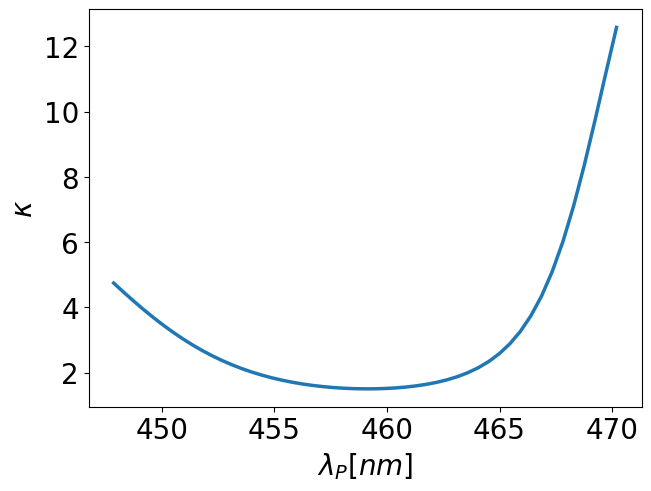

In [24]:
fig1, axs1 = plt.subplots(1, 1, sharex=True, sharey=True, constrained_layout=True)


plt.plot(1000*(2*np.pi*c0/wpvec1),purevec,linewidth=2.5)
# plt.plot(1000*(2*np.pi*c0/wpvec1),purevec,'ko',linewidth=2.5)
plt.xlabel(r'$\lambda_P [nm]$',fontsize=20) 
plt.ylabel(r"$\kappa$",fontsize=20) 
axs1.xaxis.set_tick_params(labelsize=20)
axs1.yaxis.set_tick_params(labelsize=20)
# plt.xlim(omf[0]/jnp.sqrt(jnp.pi),omf[-1]/jnp.sqrt(jnp.pi))
  
# plt.legend(prop={'size':10})

plt.savefig("Figures_export/Purity_wp_sweep.pdf", format="pdf", bbox_inches="tight")
plt.show()

#### Frequency sweep 2

In [5]:
dwp2=0.6
wpvec=np.linspace(wp0-dwp2,wp0+dwp2,5)
print(wpvec)
print(2*np.pi*c0/wpvec)

[40.48844882 40.78844882 41.08844882 41.38844882 41.68844882]
[0.46555392 0.46212976 0.4587556  0.45543035 0.45215297]


Zeroth-order phase-matching (L/2)Δk=-3.2507330161024584e-08
Relative slowness s=1/vp-1/vf=3.402032938959465e-05 [1/(10^8 m/s)]
Group velocity dispersion of the triplet mode: 0.021901719127085523 [fs^2/um]
Group velocity dispersion of the pump mode: -0.012690650589722297 [fs^2/um]


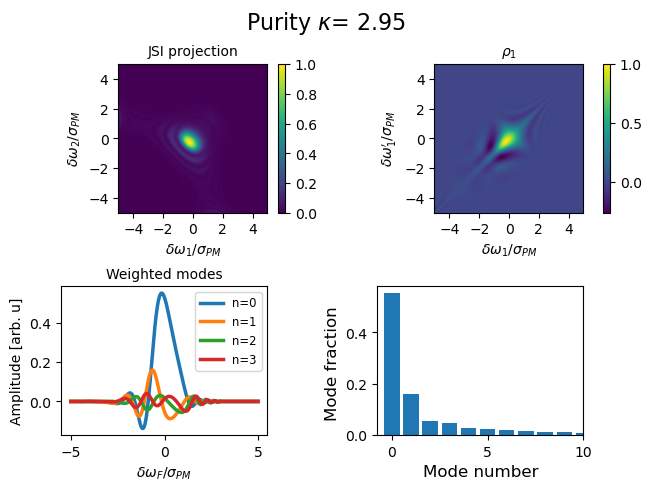

In [6]:
jsa_data0=test.topdc_scaled_auto(L,wpvec[0],wlow,whigh)   # Evaluation of the jsa calculation function
jsa_data0.plotter_scaled()

Zeroth-order phase-matching (L/2)Δk=-1.5987211554602254e-09
Relative slowness s=1/vp-1/vf=1.6556269318290795e-05 [1/(10^8 m/s)]
Group velocity dispersion of the triplet mode: 0.02190171921010106 [fs^2/um]
Group velocity dispersion of the pump mode: -0.009630515019315444 [fs^2/um]


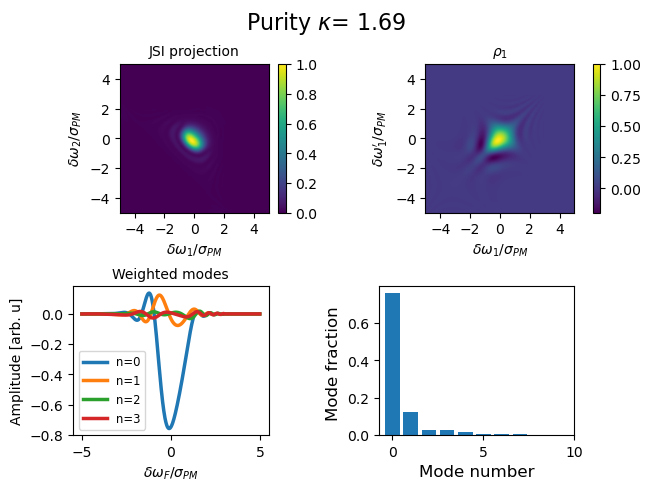

In [7]:
jsa_data1=test.topdc_scaled_auto(L,wpvec[1],wlow,whigh)   # Evaluation of the jsa calculation function
jsa_data1.plotter_scaled()

Zeroth-order phase-matching (L/2)Δk=5.329070518200751e-10
Relative slowness s=1/vp-1/vf=1.7678895546935358e-05 [1/(10^8 m/s)]
Group velocity dispersion of the triplet mode: 0.021901719214786897 [fs^2/um]
Group velocity dispersion of the pump mode: -0.006399378811342005 [fs^2/um]


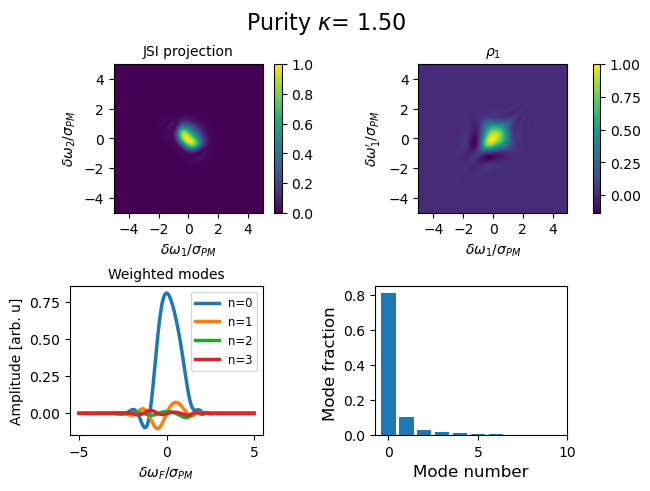

In [8]:
jsa_data2=test.topdc_scaled_auto(L,wpvec[2],wlow,whigh)   # Evaluation of the jsa calculation function
jsa_data2.plotter_scaled()

Zeroth-order phase-matching (L/2)Δk=-5.329070518200751e-10
Relative slowness s=1/vp-1/vf=3.675969409699942e-05 [1/(10^8 m/s)]
Group velocity dispersion of the triplet mode: 0.021901719214485055 [fs^2/um]
Group velocity dispersion of the pump mode: -0.002990311887515751 [fs^2/um]


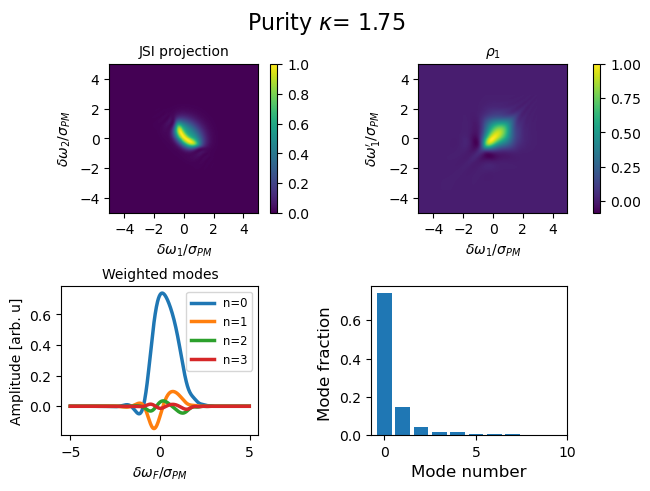

In [9]:
jsa_data3=test.topdc_scaled_auto(L,wpvec[3],wlow,whigh)   # Evaluation of the jsa calculation function
jsa_data3.plotter_scaled()

Zeroth-order phase-matching (L/2)Δk=0.0
Relative slowness s=1/vp-1/vf=7.273271041075002e-05 [1/(10^8 m/s)]
Group velocity dispersion of the triplet mode: 0.021901719216670806 [fs^2/um]
Group velocity dispersion of the pump mode: 0.0006026602628717015 [fs^2/um]


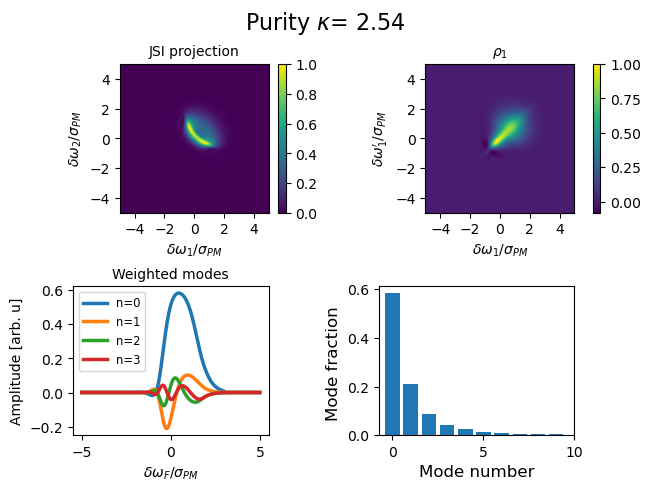

In [10]:
jsa_data4=test.topdc_scaled_auto(L,wpvec[4],wlow,whigh)   # Evaluation of the jsa calculation function
jsa_data4.plotter_scaled()

In [11]:
purityfreqsweepdict={
    "tag":"36_GeO2_doped_fibers_rco_849nm_rcl_2340p86nm_30cm",
    "L":L,
    "wpvec":wpvec,
    "wf0_0":jsa_data0.wf0,
    "wf0_1":jsa_data1.wf0,
    "wf0_2":jsa_data2.wf0,
    "wf0_3":jsa_data3.wf0,
    "wf0_4":jsa_data4.wf0,
    "sigmap_0":jsa_data0.sigmap,
    "sigmap_1":jsa_data1.sigmap,
    "sigmap_2":jsa_data2.sigmap,
    "sigmap_3":jsa_data3.sigmap,
    "sigmap_4":jsa_data4.sigmap,
    "omf_0":jsa_data0.omega,
    "omf_1":jsa_data1.omega,
    "omf_2":jsa_data2.omega,
    "omf_3":jsa_data3.omega,
    "omf_4":jsa_data4.omega,
    "jsi_0":jsa_data0.jsa_proj,
    "jsi_1":jsa_data1.jsa_proj,
    "jsi_2":jsa_data2.jsa_proj,
    "jsi_3":jsa_data3.jsa_proj,
    "jsi_4":jsa_data4.jsa_proj,
    "rho_0":jsa_data0.density_matrix,
    "rho_1":jsa_data1.density_matrix,
    "rho_2":jsa_data2.density_matrix,
    "rho_3":jsa_data3.density_matrix,
    "rho_4":jsa_data4.density_matrix,
    "purity0":jsa_data0.purity,
    "purity1":jsa_data1.purity,
    "purity2":jsa_data2.purity,
    "purity3":jsa_data3.purity,
    "purity4":jsa_data4.purity

}
savemat("Data_export/36GeO2_rco_849nm_rcl_2340p86nm_purity_wp_sweep.mat",purityfreqsweepdict)

In [12]:
njsa_data0=jsa_data0.jsa_proj/np.max(jsa_data0.jsa_proj)
njsa_data1=jsa_data1.jsa_proj/np.max(jsa_data1.jsa_proj)
njsa_data2=jsa_data2.jsa_proj/np.max(jsa_data2.jsa_proj)
njsa_data3=jsa_data3.jsa_proj/np.max(jsa_data3.jsa_proj)
njsa_data4=jsa_data4.jsa_proj/np.max(jsa_data4.jsa_proj)

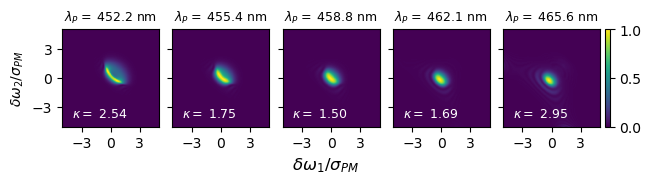

In [16]:
plt.rcParams['axes.titlesize']=9

figrs, axsrs = plt.subplots(1, 5, sharex=True, sharey=True, constrained_layout=True)
# figrs.suptitle('JSI Projections',y=0.8)

c1rs=axsrs[4].pcolor(jsa_data0.omega,jsa_data0.omega, njsa_data0, rasterized=True)
axsrs[3].pcolor(jsa_data1.omega,jsa_data1.omega, njsa_data1, rasterized=True)
axsrs[2].pcolor(jsa_data2.omega,jsa_data2.omega, njsa_data2, rasterized=True)
axsrs[1].pcolor(jsa_data3.omega,jsa_data3.omega, njsa_data3, rasterized=True)
axsrs[0].pcolor(jsa_data4.omega,jsa_data4.omega, njsa_data4, rasterized=True)
axsrs[4].set_box_aspect(1)
axsrs[3].set_box_aspect(1)
axsrs[2].set_box_aspect(1)
axsrs[1].set_box_aspect(1)
axsrs[0].set_box_aspect(1)
axsrs[0].set_ylabel(r'$\delta\omega_{2}/\sigma_{PM}$')

figrs.supxlabel(r"$\delta\omega_{1}/\sigma_{PM}$",y=0.3,fontsize=12)



axsrs[4].title.set_text(r'$\lambda_P=$ %.1f nm'%(2*np.pi*c0*1000/wpvec[0]))
axsrs[3].title.set_text(r'$\lambda_P=$ %.1f nm'%(2*np.pi*c0*1000/wpvec[1]))
axsrs[2].title.set_text(r'$\lambda_P=$ %.1f nm'%(2*np.pi*c0*1000/wpvec[2]))
axsrs[1].title.set_text(r'$\lambda_P=$ %.1f nm'%(2*np.pi*c0*1000/wpvec[3]))
axsrs[0].title.set_text(r'$\lambda_P=$ %.1f nm'%(2*np.pi*c0*1000/wpvec[4]))

# Automatically set ticks using MaxNLocator
axsrs[0].xaxis.set_major_locator(MaxNLocator(integer=True,nbins=4))  # For x-axis
axsrs[0].yaxis.set_major_locator(MaxNLocator(integer=True,nbins=4))  # For y-axis

axsrs[4].text(0.1,0.1, r'$\kappa=$ %.2f'%jsa_data0.purity,color='white',transform=axsrs[4].transAxes,fontsize=9)
axsrs[3].text(0.1,0.1, r'$\kappa=$ %.2f'%jsa_data1.purity,color='white',transform=axsrs[3].transAxes,fontsize=9)
axsrs[2].text(0.1,0.1, r'$\kappa=$ %.2f'%jsa_data2.purity,color='white',transform=axsrs[2].transAxes,fontsize=9)
axsrs[1].text(0.1,0.1, r'$\kappa=$ %.2f'%jsa_data3.purity,color='white',transform=axsrs[1].transAxes,fontsize=9)
axsrs[0].text(0.1,0.1, r'$\kappa=$ %.2f'%jsa_data4.purity,color='white',transform=axsrs[0].transAxes,fontsize=9)

  
figrs.colorbar(c1rs,ax=axsrs[4],fraction=0.05)

plt.savefig("Figures_export/jsi_wp_sweep.pdf", format="pdf", bbox_inches="tight")
plt.show()